In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 이미지 읽기와 화면 표시

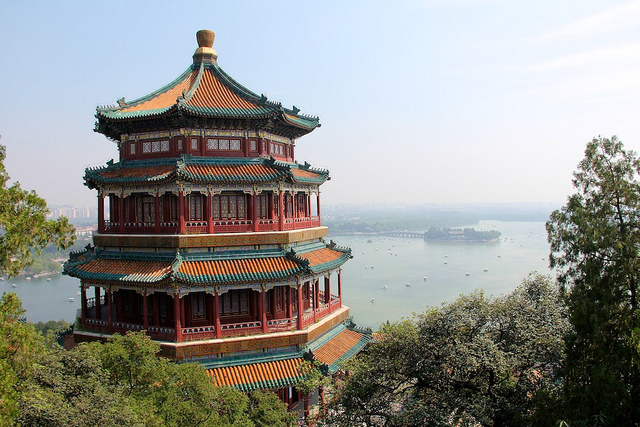

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2

image_path = "/content/drive/MyDrive/dataset/china.jpg"
img = cv2.imread(image_path)
cv2_imshow(img)

### 색상 보정

[]

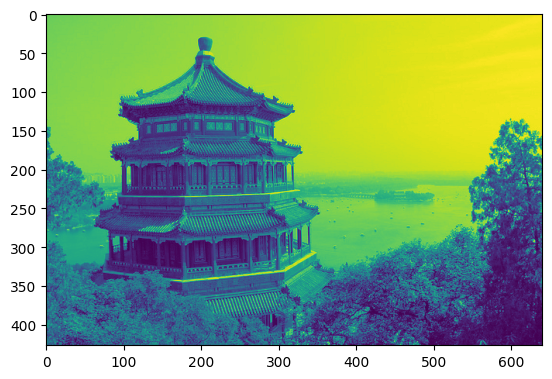

In [ ]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.plot()

### 영상 크기 조정

[]

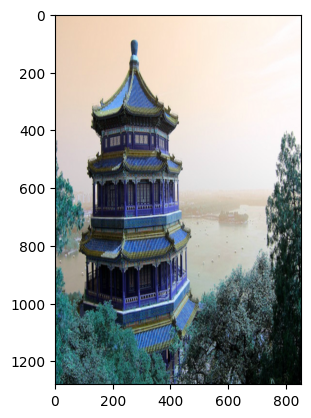

In [ ]:
r,c = img.shape[:2]
new_img = cv2.resize(img, (2*r, 2*c))
plt.imshow(new_img)
plt.plot()

### 영상 영역의 이동

[]

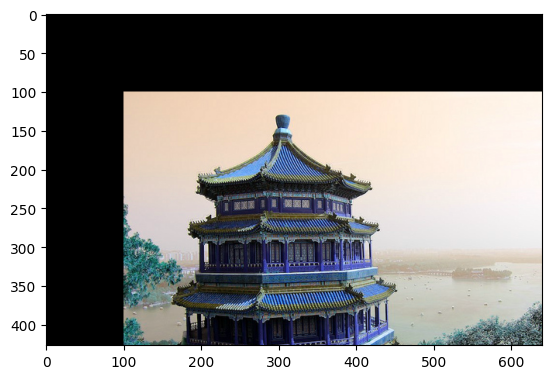

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = cv2.imread(image_path)
r, c = img.shape[:2]
M = np.float32([[1, 0, 100],[0,1,100]])
new_img = cv.warpAffine(img, M, (c,r))
plt.imshow(new_img)
plt.plot()

### 영상의 회전

[]

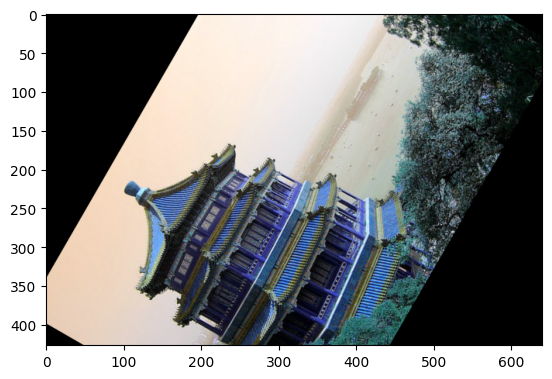

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = cv2.imread(image_path)
r, c = img.shape[:2]
M = cv.getRotationMatrix2D((c/2, r/2),60,1)
new_img = cv.warpAffine(img, M, (c,r))

plt.imshow(new_img)
plt.plot()

### Linear Interpolation

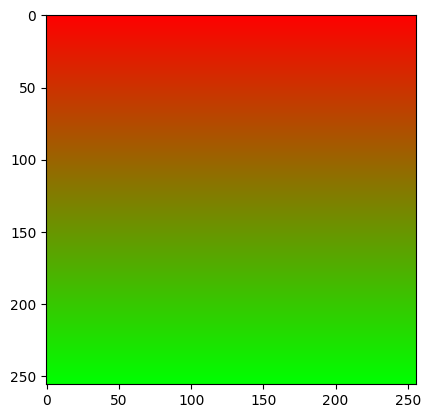

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def color_rect():
  # color rectangle 생성
  g = np.zeros((256,256,3), np.uint8)

  for i in range(256):
    g[i,:,:] = (0, i, 255-i)

  return g

g = color_rect()

#cv.imshow('Org', g)

col = cv.cvtColor(g, cv.COLOR_BGR2RGB)
plt.imshow(col)
plt.show()

### Lab.1

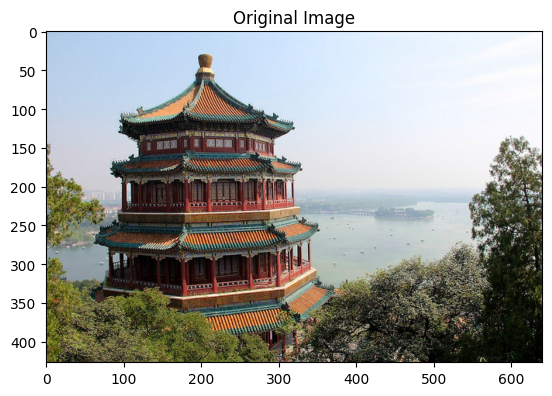

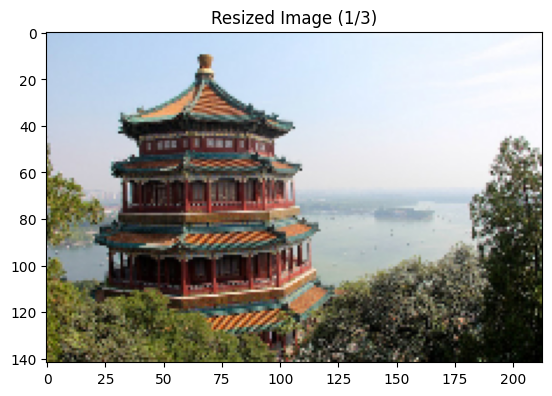

In [ ]:
# 1. 파일에서 읽은 영상에 대해 가로 세로를 1/3로 줄인 영상을 생성하는 함수를 작성함. China 영상을 이용하여 결과를 확인
image_path = "/content/drive/MyDrive/dataset/china.jpg"

def resize_img(image_path):
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()
    r, c = img.shape[:2]

    new_img = cv2.resize(img, (int(c*1/3), int(r*1/3)))
    plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
    plt.title('Resized Image (1/3)')
    plt.show()

resize_img(image_path)

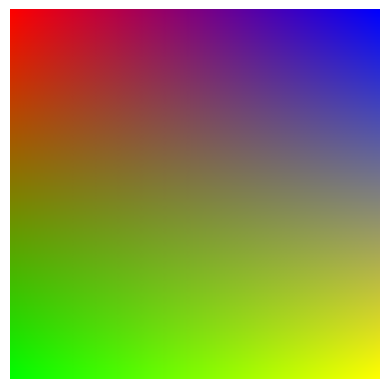

In [ ]:
import cv2
from matplotlib import pyplot as plt

def create_color_image_with_bilinear_interpolation():
    width, height = 256, 256
    image = np.zeros((height, width, 3), dtype=np.uint8)

    # 네 모서리의 색상 지정
    colors = np.array([
        [0, 0, 255],  # 상단 왼쪽: 빨강
        [255, 0, 0],  # 상단 오른쪽: 파랑
        [0, 255, 0],  # 하단 왼쪽: 초록
        [0, 255, 255] # 하단 오른쪽: 노랑
    ])

    for x in range(width):
        for y in range(height):
            # x, y의 비율 계산
            rx = x / (width - 1)
            ry = y / (height - 1)

            # 양선형 보간
            top = (1 - rx) * colors[0] + rx * colors[1]
            bottom = (1 - rx) * colors[2] + rx * colors[3]
            color = (1 - ry) * top + ry * bottom

            image[y, x, :] = color

    return image

# 두 번째 작업 실행
bilinear_image = create_color_image_with_bilinear_interpolation()

# 이미지 시각화
plt.imshow(cv2.cvtColor(bilinear_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()